In [35]:
from twython import TwythonStreamer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from pprint import pprint
import re
import pymongo
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os
import pickle

In [36]:
#twitter keys
CONSUMER_KEY = r'Et3rX2Zjpa2VQVGUJSbMgj960'
CONSUMER_SECRET = r'jBzvvxc6MS3ErmP7HBb53VyqoktUKVblxgpUtv19r5O9hrOXqV'
ACCESS_TOKEN = r'357028618-gIFRDv1f5tsBX5KZCR4u7hgKuufIPjiTQ9m4K4kw'
ACCESS_TOKEN_SECRET = r'0Wlzyj0hpBqEKJZ5sUbr8AWQC0CvHedHM19IAYTx7kKXP'
hack_rule = 'hack|data|breach|ransom|57|code'

In [37]:
analyser = SentimentIntensityAnalyzer() #Initializes Sentiment Analyser.
negdict = {}
posdict = {}
negawords = {}
poswords = {}
conn = pymongo.MongoClient() #Creates a connection to local MongoDB database.
tweet_collection = conn.uber.ubertweets #Creates a collection called tweets. 
array = []
negcount = 0
poscount = 0

In [38]:
from nltk.corpus import stopwords

In [39]:
stop = stopwords.words('english')

with open(r'C:\Data\twitterwords.txt','r') as twitterwords:
    twwords = [line.strip() for line in twitterwords] #Lists of all the most commen words on twitter.

with open(r"C:\Data\dictionarywords.txt",'r') as dictwords:
    dictwords = [line.strip() for line in dictwords] #Lists of all words in the english dictionary.


In [40]:
class MyStreamer(TwythonStreamer):  # inherits from base class TwythonStreamer.

    counter = 0
    def on_success(self, data):
            try:
                tweet_dict = {}
                tweet_dict['text'] = data['text']
                tweet_dict['sentiment'] = analyser.polarity_scores(data['text'])['compound']
                array.append(tweet_dict) #creates an array of dictionaries.
                if data['lang'] == 'en':
                    MyStreamer.counter += 1
                    print('Yes - Tweet number {a} has arrived'.format(a=MyStreamer.counter))
                    tweet_words = [words.strip().replace(':','') for words in data['text'].split()]
                    twe = [w for w in tweet_words if w in dictwords]
                    tweets = [wor.lower().strip() for wor in twe if wor.lower().strip() not in (stop and twwords)]
                    for word in tweets:
                        if float(analyser.polarity_scores(data['text'])['compound'])<0 and re.search(hack_rule,data['text'])==None:
                             negdict[word] = negdict.get(word,0) + 1 #Collects negative sentiment words.
                        elif float(analyser.polarity_scores(data['text'])['compound'])>0 and re.search(hack_rule,data['text'])==None:
                            posdict[word] = posdict.get(word,0) + 1 #Collects positive sentiment words.

            except:
                pass

    def on_error(self, status_code, data):
        print(status_code, data)
        self.disconnect()


stream = MyStreamer(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

In [41]:
while True:
    stream.statuses.filter(track='uber,Uber,UBER') 
#Searches for Uber related tweets.

Yes - Tweet number 1 has arrived
Yes - Tweet number 2 has arrived
Yes - Tweet number 3 has arrived
Yes - Tweet number 4 has arrived
Yes - Tweet number 5 has arrived
Yes - Tweet number 6 has arrived
Yes - Tweet number 7 has arrived
Yes - Tweet number 8 has arrived
Yes - Tweet number 9 has arrived
Yes - Tweet number 10 has arrived
Yes - Tweet number 11 has arrived
Yes - Tweet number 12 has arrived
Yes - Tweet number 13 has arrived
Yes - Tweet number 14 has arrived
Yes - Tweet number 15 has arrived
Yes - Tweet number 16 has arrived
Yes - Tweet number 17 has arrived
Yes - Tweet number 18 has arrived
Yes - Tweet number 19 has arrived
Yes - Tweet number 20 has arrived
Yes - Tweet number 21 has arrived
Yes - Tweet number 22 has arrived
Yes - Tweet number 23 has arrived
Yes - Tweet number 24 has arrived
Yes - Tweet number 25 has arrived
Yes - Tweet number 26 has arrived
Yes - Tweet number 27 has arrived
Yes - Tweet number 28 has arrived
Yes - Tweet number 29 has arrived
Yes - Tweet number 30 h

Yes - Tweet number 239 has arrived
Yes - Tweet number 240 has arrived
Yes - Tweet number 241 has arrived
Yes - Tweet number 242 has arrived
Yes - Tweet number 243 has arrived
Yes - Tweet number 244 has arrived
Yes - Tweet number 245 has arrived
Yes - Tweet number 246 has arrived
Yes - Tweet number 247 has arrived
Yes - Tweet number 248 has arrived
Yes - Tweet number 249 has arrived
Yes - Tweet number 250 has arrived
Yes - Tweet number 251 has arrived
Yes - Tweet number 252 has arrived
Yes - Tweet number 253 has arrived
Yes - Tweet number 254 has arrived
Yes - Tweet number 255 has arrived
Yes - Tweet number 256 has arrived
Yes - Tweet number 257 has arrived
Yes - Tweet number 258 has arrived
Yes - Tweet number 259 has arrived
Yes - Tweet number 260 has arrived
Yes - Tweet number 261 has arrived
Yes - Tweet number 262 has arrived
Yes - Tweet number 263 has arrived
Yes - Tweet number 264 has arrived
Yes - Tweet number 265 has arrived
Yes - Tweet number 266 has arrived
Yes - Tweet number 2

Yes - Tweet number 479 has arrived
Yes - Tweet number 480 has arrived
Yes - Tweet number 481 has arrived
Yes - Tweet number 482 has arrived
Yes - Tweet number 483 has arrived
Yes - Tweet number 484 has arrived
Yes - Tweet number 485 has arrived
Yes - Tweet number 486 has arrived
Yes - Tweet number 487 has arrived
Yes - Tweet number 488 has arrived
Yes - Tweet number 489 has arrived
Yes - Tweet number 490 has arrived
Yes - Tweet number 491 has arrived
Yes - Tweet number 492 has arrived
Yes - Tweet number 493 has arrived
Yes - Tweet number 494 has arrived
Yes - Tweet number 495 has arrived
Yes - Tweet number 496 has arrived
Yes - Tweet number 497 has arrived
Yes - Tweet number 498 has arrived
Yes - Tweet number 499 has arrived
Yes - Tweet number 500 has arrived
Yes - Tweet number 501 has arrived
Yes - Tweet number 502 has arrived
Yes - Tweet number 503 has arrived
Yes - Tweet number 504 has arrived
Yes - Tweet number 505 has arrived
Yes - Tweet number 506 has arrived
Yes - Tweet number 5

Yes - Tweet number 714 has arrived
Yes - Tweet number 715 has arrived
Yes - Tweet number 716 has arrived
Yes - Tweet number 717 has arrived
Yes - Tweet number 718 has arrived
Yes - Tweet number 719 has arrived
Yes - Tweet number 720 has arrived
Yes - Tweet number 721 has arrived
Yes - Tweet number 722 has arrived
Yes - Tweet number 723 has arrived
Yes - Tweet number 724 has arrived
Yes - Tweet number 725 has arrived
Yes - Tweet number 726 has arrived
Yes - Tweet number 727 has arrived
Yes - Tweet number 728 has arrived
Yes - Tweet number 729 has arrived
Yes - Tweet number 730 has arrived
Yes - Tweet number 731 has arrived
Yes - Tweet number 732 has arrived
Yes - Tweet number 733 has arrived
Yes - Tweet number 734 has arrived
Yes - Tweet number 735 has arrived
Yes - Tweet number 736 has arrived
Yes - Tweet number 737 has arrived
Yes - Tweet number 738 has arrived
Yes - Tweet number 739 has arrived
Yes - Tweet number 740 has arrived
Yes - Tweet number 741 has arrived
Yes - Tweet number 7

Yes - Tweet number 949 has arrived
Yes - Tweet number 950 has arrived
Yes - Tweet number 951 has arrived
Yes - Tweet number 952 has arrived
Yes - Tweet number 953 has arrived
Yes - Tweet number 954 has arrived
Yes - Tweet number 955 has arrived
Yes - Tweet number 956 has arrived
Yes - Tweet number 957 has arrived
Yes - Tweet number 958 has arrived
Yes - Tweet number 959 has arrived
Yes - Tweet number 960 has arrived
Yes - Tweet number 961 has arrived
Yes - Tweet number 962 has arrived
Yes - Tweet number 963 has arrived
Yes - Tweet number 964 has arrived
Yes - Tweet number 965 has arrived
Yes - Tweet number 966 has arrived
Yes - Tweet number 967 has arrived
Yes - Tweet number 968 has arrived
Yes - Tweet number 969 has arrived
Yes - Tweet number 970 has arrived
Yes - Tweet number 971 has arrived
Yes - Tweet number 972 has arrived
Yes - Tweet number 973 has arrived
Yes - Tweet number 974 has arrived
Yes - Tweet number 975 has arrived
Yes - Tweet number 976 has arrived
Yes - Tweet number 9

Yes - Tweet number 1178 has arrived
Yes - Tweet number 1179 has arrived
Yes - Tweet number 1180 has arrived
Yes - Tweet number 1181 has arrived
Yes - Tweet number 1182 has arrived
Yes - Tweet number 1183 has arrived
Yes - Tweet number 1184 has arrived
Yes - Tweet number 1185 has arrived
Yes - Tweet number 1186 has arrived
Yes - Tweet number 1187 has arrived
Yes - Tweet number 1188 has arrived
Yes - Tweet number 1189 has arrived
Yes - Tweet number 1190 has arrived
Yes - Tweet number 1191 has arrived
Yes - Tweet number 1192 has arrived
Yes - Tweet number 1193 has arrived
Yes - Tweet number 1194 has arrived
Yes - Tweet number 1195 has arrived
Yes - Tweet number 1196 has arrived
Yes - Tweet number 1197 has arrived
Yes - Tweet number 1198 has arrived
Yes - Tweet number 1199 has arrived
Yes - Tweet number 1200 has arrived
Yes - Tweet number 1201 has arrived
Yes - Tweet number 1202 has arrived
Yes - Tweet number 1203 has arrived
Yes - Tweet number 1204 has arrived
Yes - Tweet number 1205 has 

Yes - Tweet number 1406 has arrived
Yes - Tweet number 1407 has arrived
Yes - Tweet number 1408 has arrived
Yes - Tweet number 1409 has arrived
Yes - Tweet number 1410 has arrived
Yes - Tweet number 1411 has arrived
Yes - Tweet number 1412 has arrived
Yes - Tweet number 1413 has arrived
Yes - Tweet number 1414 has arrived
Yes - Tweet number 1415 has arrived
Yes - Tweet number 1416 has arrived
Yes - Tweet number 1417 has arrived
Yes - Tweet number 1418 has arrived
Yes - Tweet number 1419 has arrived
Yes - Tweet number 1420 has arrived
Yes - Tweet number 1421 has arrived
Yes - Tweet number 1422 has arrived
Yes - Tweet number 1423 has arrived
Yes - Tweet number 1424 has arrived
Yes - Tweet number 1425 has arrived
Yes - Tweet number 1426 has arrived
Yes - Tweet number 1427 has arrived
Yes - Tweet number 1428 has arrived
Yes - Tweet number 1429 has arrived
Yes - Tweet number 1430 has arrived
Yes - Tweet number 1431 has arrived
Yes - Tweet number 1432 has arrived
Yes - Tweet number 1433 has 

Yes - Tweet number 1634 has arrived
Yes - Tweet number 1635 has arrived
Yes - Tweet number 1636 has arrived
Yes - Tweet number 1637 has arrived
Yes - Tweet number 1638 has arrived
Yes - Tweet number 1639 has arrived
Yes - Tweet number 1640 has arrived
Yes - Tweet number 1641 has arrived
Yes - Tweet number 1642 has arrived
Yes - Tweet number 1643 has arrived
Yes - Tweet number 1644 has arrived
Yes - Tweet number 1645 has arrived
Yes - Tweet number 1646 has arrived
Yes - Tweet number 1647 has arrived
Yes - Tweet number 1648 has arrived
Yes - Tweet number 1649 has arrived
Yes - Tweet number 1650 has arrived
Yes - Tweet number 1651 has arrived
Yes - Tweet number 1652 has arrived
Yes - Tweet number 1653 has arrived
Yes - Tweet number 1654 has arrived
Yes - Tweet number 1655 has arrived
Yes - Tweet number 1656 has arrived
Yes - Tweet number 1657 has arrived
Yes - Tweet number 1658 has arrived
Yes - Tweet number 1659 has arrived
Yes - Tweet number 1660 has arrived
Yes - Tweet number 1661 has 

Yes - Tweet number 1863 has arrived
Yes - Tweet number 1864 has arrived
Yes - Tweet number 1865 has arrived
Yes - Tweet number 1866 has arrived
Yes - Tweet number 1867 has arrived
Yes - Tweet number 1868 has arrived
Yes - Tweet number 1869 has arrived
Yes - Tweet number 1870 has arrived
Yes - Tweet number 1871 has arrived
Yes - Tweet number 1872 has arrived
Yes - Tweet number 1873 has arrived
Yes - Tweet number 1874 has arrived
Yes - Tweet number 1875 has arrived
Yes - Tweet number 1876 has arrived
Yes - Tweet number 1877 has arrived
Yes - Tweet number 1878 has arrived
Yes - Tweet number 1879 has arrived
Yes - Tweet number 1880 has arrived
Yes - Tweet number 1881 has arrived
Yes - Tweet number 1882 has arrived
Yes - Tweet number 1883 has arrived
Yes - Tweet number 1884 has arrived
Yes - Tweet number 1885 has arrived
Yes - Tweet number 1886 has arrived
Yes - Tweet number 1887 has arrived
Yes - Tweet number 1888 has arrived
Yes - Tweet number 1889 has arrived
Yes - Tweet number 1890 has 

Yes - Tweet number 2091 has arrived
Yes - Tweet number 2092 has arrived
Yes - Tweet number 2093 has arrived
Yes - Tweet number 2094 has arrived
Yes - Tweet number 2095 has arrived
Yes - Tweet number 2096 has arrived
Yes - Tweet number 2097 has arrived
Yes - Tweet number 2098 has arrived
Yes - Tweet number 2099 has arrived
Yes - Tweet number 2100 has arrived
Yes - Tweet number 2101 has arrived
Yes - Tweet number 2102 has arrived
Yes - Tweet number 2103 has arrived
Yes - Tweet number 2104 has arrived
Yes - Tweet number 2105 has arrived
Yes - Tweet number 2106 has arrived
Yes - Tweet number 2107 has arrived
Yes - Tweet number 2108 has arrived
Yes - Tweet number 2109 has arrived
Yes - Tweet number 2110 has arrived
Yes - Tweet number 2111 has arrived
Yes - Tweet number 2112 has arrived
Yes - Tweet number 2113 has arrived
Yes - Tweet number 2114 has arrived
Yes - Tweet number 2115 has arrived
Yes - Tweet number 2116 has arrived
Yes - Tweet number 2117 has arrived
Yes - Tweet number 2118 has 

Yes - Tweet number 2319 has arrived
Yes - Tweet number 2320 has arrived
Yes - Tweet number 2321 has arrived
Yes - Tweet number 2322 has arrived
Yes - Tweet number 2323 has arrived
Yes - Tweet number 2324 has arrived
Yes - Tweet number 2325 has arrived
Yes - Tweet number 2326 has arrived
Yes - Tweet number 2327 has arrived
Yes - Tweet number 2328 has arrived
Yes - Tweet number 2329 has arrived
Yes - Tweet number 2330 has arrived
Yes - Tweet number 2331 has arrived
Yes - Tweet number 2332 has arrived
Yes - Tweet number 2333 has arrived
Yes - Tweet number 2334 has arrived
Yes - Tweet number 2335 has arrived
Yes - Tweet number 2336 has arrived
Yes - Tweet number 2337 has arrived
Yes - Tweet number 2338 has arrived
Yes - Tweet number 2339 has arrived
Yes - Tweet number 2340 has arrived
Yes - Tweet number 2341 has arrived
Yes - Tweet number 2342 has arrived
Yes - Tweet number 2343 has arrived
Yes - Tweet number 2344 has arrived
Yes - Tweet number 2345 has arrived
Yes - Tweet number 2346 has 

Yes - Tweet number 2548 has arrived
Yes - Tweet number 2549 has arrived
Yes - Tweet number 2550 has arrived
Yes - Tweet number 2551 has arrived
Yes - Tweet number 2552 has arrived
Yes - Tweet number 2553 has arrived
Yes - Tweet number 2554 has arrived
Yes - Tweet number 2555 has arrived
Yes - Tweet number 2556 has arrived
Yes - Tweet number 2557 has arrived
Yes - Tweet number 2558 has arrived
Yes - Tweet number 2559 has arrived
Yes - Tweet number 2560 has arrived
Yes - Tweet number 2561 has arrived
Yes - Tweet number 2562 has arrived
Yes - Tweet number 2563 has arrived
Yes - Tweet number 2564 has arrived
Yes - Tweet number 2565 has arrived
Yes - Tweet number 2566 has arrived
Yes - Tweet number 2567 has arrived
Yes - Tweet number 2568 has arrived
Yes - Tweet number 2569 has arrived
Yes - Tweet number 2570 has arrived
Yes - Tweet number 2571 has arrived
Yes - Tweet number 2572 has arrived
Yes - Tweet number 2573 has arrived
Yes - Tweet number 2574 has arrived
Yes - Tweet number 2575 has 

Yes - Tweet number 2776 has arrived
Yes - Tweet number 2777 has arrived
Yes - Tweet number 2778 has arrived
Yes - Tweet number 2779 has arrived
Yes - Tweet number 2780 has arrived
Yes - Tweet number 2781 has arrived
Yes - Tweet number 2782 has arrived
Yes - Tweet number 2783 has arrived
Yes - Tweet number 2784 has arrived
Yes - Tweet number 2785 has arrived
Yes - Tweet number 2786 has arrived
Yes - Tweet number 2787 has arrived
Yes - Tweet number 2788 has arrived
Yes - Tweet number 2789 has arrived
Yes - Tweet number 2790 has arrived
Yes - Tweet number 2791 has arrived
Yes - Tweet number 2792 has arrived
Yes - Tweet number 2793 has arrived
Yes - Tweet number 2794 has arrived
Yes - Tweet number 2795 has arrived
Yes - Tweet number 2796 has arrived
Yes - Tweet number 2797 has arrived
Yes - Tweet number 2798 has arrived
Yes - Tweet number 2799 has arrived
Yes - Tweet number 2800 has arrived
Yes - Tweet number 2801 has arrived
Yes - Tweet number 2802 has arrived
Yes - Tweet number 2803 has 

Yes - Tweet number 3005 has arrived
Yes - Tweet number 3006 has arrived
Yes - Tweet number 3007 has arrived
Yes - Tweet number 3008 has arrived
Yes - Tweet number 3009 has arrived
Yes - Tweet number 3010 has arrived
Yes - Tweet number 3011 has arrived
Yes - Tweet number 3012 has arrived
Yes - Tweet number 3013 has arrived
Yes - Tweet number 3014 has arrived
Yes - Tweet number 3015 has arrived
Yes - Tweet number 3016 has arrived
Yes - Tweet number 3017 has arrived
Yes - Tweet number 3018 has arrived
Yes - Tweet number 3019 has arrived
Yes - Tweet number 3020 has arrived
Yes - Tweet number 3021 has arrived
Yes - Tweet number 3022 has arrived
Yes - Tweet number 3023 has arrived
Yes - Tweet number 3024 has arrived
Yes - Tweet number 3025 has arrived
Yes - Tweet number 3026 has arrived
Yes - Tweet number 3027 has arrived
Yes - Tweet number 3028 has arrived
Yes - Tweet number 3029 has arrived
Yes - Tweet number 3030 has arrived
Yes - Tweet number 3031 has arrived
Yes - Tweet number 3032 has 

Yes - Tweet number 3233 has arrived
Yes - Tweet number 3234 has arrived
Yes - Tweet number 3235 has arrived
Yes - Tweet number 3236 has arrived
Yes - Tweet number 3237 has arrived
Yes - Tweet number 3238 has arrived
Yes - Tweet number 3239 has arrived
Yes - Tweet number 3240 has arrived
Yes - Tweet number 3241 has arrived
Yes - Tweet number 3242 has arrived
Yes - Tweet number 3243 has arrived
Yes - Tweet number 3244 has arrived
Yes - Tweet number 3245 has arrived
Yes - Tweet number 3246 has arrived
Yes - Tweet number 3247 has arrived
Yes - Tweet number 3248 has arrived
Yes - Tweet number 3249 has arrived
Yes - Tweet number 3250 has arrived
Yes - Tweet number 3251 has arrived
Yes - Tweet number 3252 has arrived
Yes - Tweet number 3253 has arrived
Yes - Tweet number 3254 has arrived
Yes - Tweet number 3255 has arrived
Yes - Tweet number 3256 has arrived
Yes - Tweet number 3257 has arrived
Yes - Tweet number 3258 has arrived
Yes - Tweet number 3259 has arrived
Yes - Tweet number 3260 has 

Yes - Tweet number 3461 has arrived
Yes - Tweet number 3462 has arrived
Yes - Tweet number 3463 has arrived
Yes - Tweet number 3464 has arrived
Yes - Tweet number 3465 has arrived
Yes - Tweet number 3466 has arrived
Yes - Tweet number 3467 has arrived
Yes - Tweet number 3468 has arrived
Yes - Tweet number 3469 has arrived
Yes - Tweet number 3470 has arrived
Yes - Tweet number 3471 has arrived
Yes - Tweet number 3472 has arrived
Yes - Tweet number 3473 has arrived
Yes - Tweet number 3474 has arrived
Yes - Tweet number 3475 has arrived
Yes - Tweet number 3476 has arrived
Yes - Tweet number 3477 has arrived
Yes - Tweet number 3478 has arrived
Yes - Tweet number 3479 has arrived
Yes - Tweet number 3480 has arrived
Yes - Tweet number 3481 has arrived
Yes - Tweet number 3482 has arrived
Yes - Tweet number 3483 has arrived
Yes - Tweet number 3484 has arrived
Yes - Tweet number 3485 has arrived
Yes - Tweet number 3486 has arrived
Yes - Tweet number 3487 has arrived
Yes - Tweet number 3488 has 

Yes - Tweet number 3689 has arrived
Yes - Tweet number 3690 has arrived
Yes - Tweet number 3691 has arrived
Yes - Tweet number 3692 has arrived
Yes - Tweet number 3693 has arrived
Yes - Tweet number 3694 has arrived
Yes - Tweet number 3695 has arrived
Yes - Tweet number 3696 has arrived
Yes - Tweet number 3697 has arrived
Yes - Tweet number 3698 has arrived
Yes - Tweet number 3699 has arrived
Yes - Tweet number 3700 has arrived
Yes - Tweet number 3701 has arrived
Yes - Tweet number 3702 has arrived
Yes - Tweet number 3703 has arrived
Yes - Tweet number 3704 has arrived
Yes - Tweet number 3705 has arrived
Yes - Tweet number 3706 has arrived
Yes - Tweet number 3707 has arrived
Yes - Tweet number 3708 has arrived
Yes - Tweet number 3709 has arrived
Yes - Tweet number 3710 has arrived
Yes - Tweet number 3711 has arrived
Yes - Tweet number 3712 has arrived
Yes - Tweet number 3713 has arrived
Yes - Tweet number 3714 has arrived
Yes - Tweet number 3715 has arrived
Yes - Tweet number 3716 has 

Yes - Tweet number 3917 has arrived
Yes - Tweet number 3918 has arrived
Yes - Tweet number 3919 has arrived
Yes - Tweet number 3920 has arrived
Yes - Tweet number 3921 has arrived
Yes - Tweet number 3922 has arrived
Yes - Tweet number 3923 has arrived
Yes - Tweet number 3924 has arrived
Yes - Tweet number 3925 has arrived
Yes - Tweet number 3926 has arrived
Yes - Tweet number 3927 has arrived
Yes - Tweet number 3928 has arrived
Yes - Tweet number 3929 has arrived
Yes - Tweet number 3930 has arrived
Yes - Tweet number 3931 has arrived
Yes - Tweet number 3932 has arrived
Yes - Tweet number 3933 has arrived
Yes - Tweet number 3934 has arrived
Yes - Tweet number 3935 has arrived
Yes - Tweet number 3936 has arrived
Yes - Tweet number 3937 has arrived
Yes - Tweet number 3938 has arrived
Yes - Tweet number 3939 has arrived
Yes - Tweet number 3940 has arrived
Yes - Tweet number 3941 has arrived
Yes - Tweet number 3942 has arrived
Yes - Tweet number 3943 has arrived
Yes - Tweet number 3944 has 

Yes - Tweet number 4145 has arrived
Yes - Tweet number 4146 has arrived
Yes - Tweet number 4147 has arrived
Yes - Tweet number 4148 has arrived
Yes - Tweet number 4149 has arrived
Yes - Tweet number 4150 has arrived
Yes - Tweet number 4151 has arrived
Yes - Tweet number 4152 has arrived
Yes - Tweet number 4153 has arrived
Yes - Tweet number 4154 has arrived
Yes - Tweet number 4155 has arrived
Yes - Tweet number 4156 has arrived
Yes - Tweet number 4157 has arrived
Yes - Tweet number 4158 has arrived
Yes - Tweet number 4159 has arrived
Yes - Tweet number 4160 has arrived
Yes - Tweet number 4161 has arrived
Yes - Tweet number 4162 has arrived
Yes - Tweet number 4163 has arrived
Yes - Tweet number 4164 has arrived
Yes - Tweet number 4165 has arrived
Yes - Tweet number 4166 has arrived
Yes - Tweet number 4167 has arrived
Yes - Tweet number 4168 has arrived
Yes - Tweet number 4169 has arrived
Yes - Tweet number 4170 has arrived
Yes - Tweet number 4171 has arrived
Yes - Tweet number 4172 has 

Yes - Tweet number 4374 has arrived
Yes - Tweet number 4375 has arrived
Yes - Tweet number 4376 has arrived
Yes - Tweet number 4377 has arrived
Yes - Tweet number 4378 has arrived
Yes - Tweet number 4379 has arrived
Yes - Tweet number 4380 has arrived
Yes - Tweet number 4381 has arrived
Yes - Tweet number 4382 has arrived
Yes - Tweet number 4383 has arrived
Yes - Tweet number 4384 has arrived
Yes - Tweet number 4385 has arrived
Yes - Tweet number 4386 has arrived
Yes - Tweet number 4387 has arrived
Yes - Tweet number 4388 has arrived
Yes - Tweet number 4389 has arrived
Yes - Tweet number 4390 has arrived
Yes - Tweet number 4391 has arrived
Yes - Tweet number 4392 has arrived
Yes - Tweet number 4393 has arrived
Yes - Tweet number 4394 has arrived
Yes - Tweet number 4395 has arrived
Yes - Tweet number 4396 has arrived
Yes - Tweet number 4397 has arrived
Yes - Tweet number 4398 has arrived
Yes - Tweet number 4399 has arrived
Yes - Tweet number 4400 has arrived
Yes - Tweet number 4401 has 

Yes - Tweet number 4602 has arrived
Yes - Tweet number 4603 has arrived
Yes - Tweet number 4604 has arrived
Yes - Tweet number 4605 has arrived
Yes - Tweet number 4606 has arrived
Yes - Tweet number 4607 has arrived
Yes - Tweet number 4608 has arrived
Yes - Tweet number 4609 has arrived
Yes - Tweet number 4610 has arrived
Yes - Tweet number 4611 has arrived
Yes - Tweet number 4612 has arrived
Yes - Tweet number 4613 has arrived
Yes - Tweet number 4614 has arrived
Yes - Tweet number 4615 has arrived
Yes - Tweet number 4616 has arrived
Yes - Tweet number 4617 has arrived
Yes - Tweet number 4618 has arrived
Yes - Tweet number 4619 has arrived
Yes - Tweet number 4620 has arrived
Yes - Tweet number 4621 has arrived
Yes - Tweet number 4622 has arrived
Yes - Tweet number 4623 has arrived
Yes - Tweet number 4624 has arrived
Yes - Tweet number 4625 has arrived
Yes - Tweet number 4626 has arrived
Yes - Tweet number 4627 has arrived
Yes - Tweet number 4628 has arrived
Yes - Tweet number 4629 has 

Yes - Tweet number 4830 has arrived
Yes - Tweet number 4831 has arrived
Yes - Tweet number 4832 has arrived
Yes - Tweet number 4833 has arrived
Yes - Tweet number 4834 has arrived
Yes - Tweet number 4835 has arrived
Yes - Tweet number 4836 has arrived
Yes - Tweet number 4837 has arrived
Yes - Tweet number 4838 has arrived
Yes - Tweet number 4839 has arrived
Yes - Tweet number 4840 has arrived
Yes - Tweet number 4841 has arrived
Yes - Tweet number 4842 has arrived
Yes - Tweet number 4843 has arrived
Yes - Tweet number 4844 has arrived
Yes - Tweet number 4845 has arrived
Yes - Tweet number 4846 has arrived
Yes - Tweet number 4847 has arrived
Yes - Tweet number 4848 has arrived
Yes - Tweet number 4849 has arrived
Yes - Tweet number 4850 has arrived
Yes - Tweet number 4851 has arrived
Yes - Tweet number 4852 has arrived
Yes - Tweet number 4853 has arrived
Yes - Tweet number 4854 has arrived
Yes - Tweet number 4855 has arrived
Yes - Tweet number 4856 has arrived
Yes - Tweet number 4857 has 

Yes - Tweet number 5058 has arrived
Yes - Tweet number 5059 has arrived
Yes - Tweet number 5060 has arrived
Yes - Tweet number 5061 has arrived
Yes - Tweet number 5062 has arrived
Yes - Tweet number 5063 has arrived
Yes - Tweet number 5064 has arrived
Yes - Tweet number 5065 has arrived
Yes - Tweet number 5066 has arrived
Yes - Tweet number 5067 has arrived
Yes - Tweet number 5068 has arrived
Yes - Tweet number 5069 has arrived
Yes - Tweet number 5070 has arrived
Yes - Tweet number 5071 has arrived
Yes - Tweet number 5072 has arrived
Yes - Tweet number 5073 has arrived
Yes - Tweet number 5074 has arrived
Yes - Tweet number 5075 has arrived
Yes - Tweet number 5076 has arrived
Yes - Tweet number 5077 has arrived
Yes - Tweet number 5078 has arrived
Yes - Tweet number 5079 has arrived
Yes - Tweet number 5080 has arrived
Yes - Tweet number 5081 has arrived
Yes - Tweet number 5082 has arrived
Yes - Tweet number 5083 has arrived
Yes - Tweet number 5084 has arrived
Yes - Tweet number 5085 has 

Yes - Tweet number 5287 has arrived
Yes - Tweet number 5288 has arrived
Yes - Tweet number 5289 has arrived
Yes - Tweet number 5290 has arrived
Yes - Tweet number 5291 has arrived
Yes - Tweet number 5292 has arrived
Yes - Tweet number 5293 has arrived
Yes - Tweet number 5294 has arrived
Yes - Tweet number 5295 has arrived
Yes - Tweet number 5296 has arrived
Yes - Tweet number 5297 has arrived
Yes - Tweet number 5298 has arrived
Yes - Tweet number 5299 has arrived
Yes - Tweet number 5300 has arrived
Yes - Tweet number 5301 has arrived
Yes - Tweet number 5302 has arrived
Yes - Tweet number 5303 has arrived
Yes - Tweet number 5304 has arrived
Yes - Tweet number 5305 has arrived
Yes - Tweet number 5306 has arrived
Yes - Tweet number 5307 has arrived
Yes - Tweet number 5308 has arrived
Yes - Tweet number 5309 has arrived
Yes - Tweet number 5310 has arrived
Yes - Tweet number 5311 has arrived
Yes - Tweet number 5312 has arrived
Yes - Tweet number 5313 has arrived
Yes - Tweet number 5314 has 

Yes - Tweet number 5515 has arrived
Yes - Tweet number 5516 has arrived
Yes - Tweet number 5517 has arrived
Yes - Tweet number 5518 has arrived
Yes - Tweet number 5519 has arrived
Yes - Tweet number 5520 has arrived
Yes - Tweet number 5521 has arrived
Yes - Tweet number 5522 has arrived
Yes - Tweet number 5523 has arrived
Yes - Tweet number 5524 has arrived
Yes - Tweet number 5525 has arrived
Yes - Tweet number 5526 has arrived
Yes - Tweet number 5527 has arrived
Yes - Tweet number 5528 has arrived
Yes - Tweet number 5529 has arrived
Yes - Tweet number 5530 has arrived
Yes - Tweet number 5531 has arrived
Yes - Tweet number 5532 has arrived
Yes - Tweet number 5533 has arrived
Yes - Tweet number 5534 has arrived
Yes - Tweet number 5535 has arrived
Yes - Tweet number 5536 has arrived
Yes - Tweet number 5537 has arrived
Yes - Tweet number 5538 has arrived
Yes - Tweet number 5539 has arrived
Yes - Tweet number 5540 has arrived
Yes - Tweet number 5541 has arrived
Yes - Tweet number 5542 has 

Yes - Tweet number 5743 has arrived
Yes - Tweet number 5744 has arrived
Yes - Tweet number 5745 has arrived
Yes - Tweet number 5746 has arrived
Yes - Tweet number 5747 has arrived
Yes - Tweet number 5748 has arrived
Yes - Tweet number 5749 has arrived
Yes - Tweet number 5750 has arrived
Yes - Tweet number 5751 has arrived
Yes - Tweet number 5752 has arrived
Yes - Tweet number 5753 has arrived
Yes - Tweet number 5754 has arrived
Yes - Tweet number 5755 has arrived
Yes - Tweet number 5756 has arrived
Yes - Tweet number 5757 has arrived
Yes - Tweet number 5758 has arrived
Yes - Tweet number 5759 has arrived
Yes - Tweet number 5760 has arrived
Yes - Tweet number 5761 has arrived
Yes - Tweet number 5762 has arrived
Yes - Tweet number 5763 has arrived
Yes - Tweet number 5764 has arrived
Yes - Tweet number 5765 has arrived
Yes - Tweet number 5766 has arrived
Yes - Tweet number 5767 has arrived
Yes - Tweet number 5768 has arrived
Yes - Tweet number 5769 has arrived
Yes - Tweet number 5770 has 

Yes - Tweet number 5971 has arrived
Yes - Tweet number 5972 has arrived
Yes - Tweet number 5973 has arrived
Yes - Tweet number 5974 has arrived
Yes - Tweet number 5975 has arrived
Yes - Tweet number 5976 has arrived
Yes - Tweet number 5977 has arrived
Yes - Tweet number 5978 has arrived
Yes - Tweet number 5979 has arrived
Yes - Tweet number 5980 has arrived
Yes - Tweet number 5981 has arrived
Yes - Tweet number 5982 has arrived
Yes - Tweet number 5983 has arrived
Yes - Tweet number 5984 has arrived
Yes - Tweet number 5985 has arrived
Yes - Tweet number 5986 has arrived
Yes - Tweet number 5987 has arrived
Yes - Tweet number 5988 has arrived
Yes - Tweet number 5989 has arrived
Yes - Tweet number 5990 has arrived
Yes - Tweet number 5991 has arrived
Yes - Tweet number 5992 has arrived
Yes - Tweet number 5993 has arrived
Yes - Tweet number 5994 has arrived
Yes - Tweet number 5995 has arrived
Yes - Tweet number 5996 has arrived
Yes - Tweet number 5997 has arrived
Yes - Tweet number 5998 has 

Yes - Tweet number 6199 has arrived
Yes - Tweet number 6200 has arrived
Yes - Tweet number 6201 has arrived
Yes - Tweet number 6202 has arrived
Yes - Tweet number 6203 has arrived
Yes - Tweet number 6204 has arrived
Yes - Tweet number 6205 has arrived
Yes - Tweet number 6206 has arrived
Yes - Tweet number 6207 has arrived
Yes - Tweet number 6208 has arrived
Yes - Tweet number 6209 has arrived
Yes - Tweet number 6210 has arrived
Yes - Tweet number 6211 has arrived
Yes - Tweet number 6212 has arrived
Yes - Tweet number 6213 has arrived
Yes - Tweet number 6214 has arrived
Yes - Tweet number 6215 has arrived
Yes - Tweet number 6216 has arrived
Yes - Tweet number 6217 has arrived
Yes - Tweet number 6218 has arrived
Yes - Tweet number 6219 has arrived
Yes - Tweet number 6220 has arrived
Yes - Tweet number 6221 has arrived
Yes - Tweet number 6222 has arrived
Yes - Tweet number 6223 has arrived
Yes - Tweet number 6224 has arrived
Yes - Tweet number 6225 has arrived
Yes - Tweet number 6226 has 

Yes - Tweet number 6427 has arrived
Yes - Tweet number 6428 has arrived
Yes - Tweet number 6429 has arrived
Yes - Tweet number 6430 has arrived
Yes - Tweet number 6431 has arrived
Yes - Tweet number 6432 has arrived
Yes - Tweet number 6433 has arrived
Yes - Tweet number 6434 has arrived
Yes - Tweet number 6435 has arrived
Yes - Tweet number 6436 has arrived
Yes - Tweet number 6437 has arrived
Yes - Tweet number 6438 has arrived
Yes - Tweet number 6439 has arrived
Yes - Tweet number 6440 has arrived
Yes - Tweet number 6441 has arrived
Yes - Tweet number 6442 has arrived
Yes - Tweet number 6443 has arrived
Yes - Tweet number 6444 has arrived
Yes - Tweet number 6445 has arrived
Yes - Tweet number 6446 has arrived
Yes - Tweet number 6447 has arrived
Yes - Tweet number 6448 has arrived
Yes - Tweet number 6449 has arrived
Yes - Tweet number 6450 has arrived
Yes - Tweet number 6451 has arrived
Yes - Tweet number 6452 has arrived
Yes - Tweet number 6453 has arrived
Yes - Tweet number 6454 has 

Yes - Tweet number 6655 has arrived
Yes - Tweet number 6656 has arrived
Yes - Tweet number 6657 has arrived
Yes - Tweet number 6658 has arrived
Yes - Tweet number 6659 has arrived
Yes - Tweet number 6660 has arrived
Yes - Tweet number 6661 has arrived
Yes - Tweet number 6662 has arrived
Yes - Tweet number 6663 has arrived
Yes - Tweet number 6664 has arrived
Yes - Tweet number 6665 has arrived
Yes - Tweet number 6666 has arrived
Yes - Tweet number 6667 has arrived
Yes - Tweet number 6668 has arrived
Yes - Tweet number 6669 has arrived
Yes - Tweet number 6670 has arrived
Yes - Tweet number 6671 has arrived
Yes - Tweet number 6672 has arrived
Yes - Tweet number 6673 has arrived
Yes - Tweet number 6674 has arrived
Yes - Tweet number 6675 has arrived
Yes - Tweet number 6676 has arrived
Yes - Tweet number 6677 has arrived
Yes - Tweet number 6678 has arrived
Yes - Tweet number 6679 has arrived
Yes - Tweet number 6680 has arrived
Yes - Tweet number 6681 has arrived
Yes - Tweet number 6682 has 

Yes - Tweet number 6883 has arrived
Yes - Tweet number 6884 has arrived
Yes - Tweet number 6885 has arrived
Yes - Tweet number 6886 has arrived
Yes - Tweet number 6887 has arrived
Yes - Tweet number 6888 has arrived
Yes - Tweet number 6889 has arrived
Yes - Tweet number 6890 has arrived
Yes - Tweet number 6891 has arrived
Yes - Tweet number 6892 has arrived
Yes - Tweet number 6893 has arrived
Yes - Tweet number 6894 has arrived
Yes - Tweet number 6895 has arrived
Yes - Tweet number 6896 has arrived
Yes - Tweet number 6897 has arrived
Yes - Tweet number 6898 has arrived
Yes - Tweet number 6899 has arrived
Yes - Tweet number 6900 has arrived
Yes - Tweet number 6901 has arrived
Yes - Tweet number 6902 has arrived
Yes - Tweet number 6903 has arrived
Yes - Tweet number 6904 has arrived
Yes - Tweet number 6905 has arrived
Yes - Tweet number 6906 has arrived
Yes - Tweet number 6907 has arrived
Yes - Tweet number 6908 has arrived
Yes - Tweet number 6909 has arrived
Yes - Tweet number 6910 has 

Yes - Tweet number 7111 has arrived
Yes - Tweet number 7112 has arrived
Yes - Tweet number 7113 has arrived
Yes - Tweet number 7114 has arrived
Yes - Tweet number 7115 has arrived
Yes - Tweet number 7116 has arrived
Yes - Tweet number 7117 has arrived
Yes - Tweet number 7118 has arrived
Yes - Tweet number 7119 has arrived
Yes - Tweet number 7120 has arrived
Yes - Tweet number 7121 has arrived
Yes - Tweet number 7122 has arrived
Yes - Tweet number 7123 has arrived
Yes - Tweet number 7124 has arrived
Yes - Tweet number 7125 has arrived
Yes - Tweet number 7126 has arrived
Yes - Tweet number 7127 has arrived
Yes - Tweet number 7128 has arrived
Yes - Tweet number 7129 has arrived
Yes - Tweet number 7130 has arrived
Yes - Tweet number 7131 has arrived
Yes - Tweet number 7132 has arrived
Yes - Tweet number 7133 has arrived
Yes - Tweet number 7134 has arrived
Yes - Tweet number 7135 has arrived
Yes - Tweet number 7136 has arrived
Yes - Tweet number 7137 has arrived
Yes - Tweet number 7138 has 

Yes - Tweet number 7339 has arrived
Yes - Tweet number 7340 has arrived
Yes - Tweet number 7341 has arrived
Yes - Tweet number 7342 has arrived
Yes - Tweet number 7343 has arrived
Yes - Tweet number 7344 has arrived
Yes - Tweet number 7345 has arrived
Yes - Tweet number 7346 has arrived
Yes - Tweet number 7347 has arrived
Yes - Tweet number 7348 has arrived
Yes - Tweet number 7349 has arrived
Yes - Tweet number 7350 has arrived
Yes - Tweet number 7351 has arrived
Yes - Tweet number 7352 has arrived
Yes - Tweet number 7353 has arrived
Yes - Tweet number 7354 has arrived
Yes - Tweet number 7355 has arrived
Yes - Tweet number 7356 has arrived
Yes - Tweet number 7357 has arrived
Yes - Tweet number 7358 has arrived
Yes - Tweet number 7359 has arrived
Yes - Tweet number 7360 has arrived
Yes - Tweet number 7361 has arrived
Yes - Tweet number 7362 has arrived
Yes - Tweet number 7363 has arrived
Yes - Tweet number 7364 has arrived
Yes - Tweet number 7365 has arrived
Yes - Tweet number 7366 has 

Yes - Tweet number 7567 has arrived
Yes - Tweet number 7568 has arrived
Yes - Tweet number 7569 has arrived
Yes - Tweet number 7570 has arrived
Yes - Tweet number 7571 has arrived
Yes - Tweet number 7572 has arrived
Yes - Tweet number 7573 has arrived
Yes - Tweet number 7574 has arrived
Yes - Tweet number 7575 has arrived
Yes - Tweet number 7576 has arrived
Yes - Tweet number 7577 has arrived
Yes - Tweet number 7578 has arrived
Yes - Tweet number 7579 has arrived
Yes - Tweet number 7580 has arrived
Yes - Tweet number 7581 has arrived
Yes - Tweet number 7582 has arrived
Yes - Tweet number 7583 has arrived
Yes - Tweet number 7584 has arrived
Yes - Tweet number 7585 has arrived
Yes - Tweet number 7586 has arrived
Yes - Tweet number 7587 has arrived
Yes - Tweet number 7588 has arrived
Yes - Tweet number 7589 has arrived
Yes - Tweet number 7590 has arrived
Yes - Tweet number 7591 has arrived
Yes - Tweet number 7592 has arrived
Yes - Tweet number 7593 has arrived
Yes - Tweet number 7594 has 

Yes - Tweet number 7795 has arrived
Yes - Tweet number 7796 has arrived
Yes - Tweet number 7797 has arrived
Yes - Tweet number 7798 has arrived
Yes - Tweet number 7799 has arrived
Yes - Tweet number 7800 has arrived
Yes - Tweet number 7801 has arrived
Yes - Tweet number 7802 has arrived
Yes - Tweet number 7803 has arrived
Yes - Tweet number 7804 has arrived
Yes - Tweet number 7805 has arrived
Yes - Tweet number 7806 has arrived
Yes - Tweet number 7807 has arrived
Yes - Tweet number 7808 has arrived
Yes - Tweet number 7809 has arrived
Yes - Tweet number 7810 has arrived
Yes - Tweet number 7811 has arrived
Yes - Tweet number 7812 has arrived
Yes - Tweet number 7813 has arrived
Yes - Tweet number 7814 has arrived
Yes - Tweet number 7815 has arrived
Yes - Tweet number 7816 has arrived
Yes - Tweet number 7817 has arrived
Yes - Tweet number 7818 has arrived
Yes - Tweet number 7819 has arrived
Yes - Tweet number 7820 has arrived
Yes - Tweet number 7821 has arrived
Yes - Tweet number 7822 has 

Yes - Tweet number 8023 has arrived
Yes - Tweet number 8024 has arrived
Yes - Tweet number 8025 has arrived
Yes - Tweet number 8026 has arrived
Yes - Tweet number 8027 has arrived
Yes - Tweet number 8028 has arrived
Yes - Tweet number 8029 has arrived
Yes - Tweet number 8030 has arrived
Yes - Tweet number 8031 has arrived
Yes - Tweet number 8032 has arrived
Yes - Tweet number 8033 has arrived
Yes - Tweet number 8034 has arrived
Yes - Tweet number 8035 has arrived
Yes - Tweet number 8036 has arrived
Yes - Tweet number 8037 has arrived
Yes - Tweet number 8038 has arrived
Yes - Tweet number 8039 has arrived
Yes - Tweet number 8040 has arrived
Yes - Tweet number 8041 has arrived
Yes - Tweet number 8042 has arrived
Yes - Tweet number 8043 has arrived
Yes - Tweet number 8044 has arrived
Yes - Tweet number 8045 has arrived
Yes - Tweet number 8046 has arrived
Yes - Tweet number 8047 has arrived
Yes - Tweet number 8048 has arrived
Yes - Tweet number 8049 has arrived
Yes - Tweet number 8050 has 

Yes - Tweet number 8251 has arrived
Yes - Tweet number 8252 has arrived
Yes - Tweet number 8253 has arrived
Yes - Tweet number 8254 has arrived
Yes - Tweet number 8255 has arrived
Yes - Tweet number 8256 has arrived
Yes - Tweet number 8257 has arrived
Yes - Tweet number 8258 has arrived
Yes - Tweet number 8259 has arrived
Yes - Tweet number 8260 has arrived
Yes - Tweet number 8261 has arrived
Yes - Tweet number 8262 has arrived
Yes - Tweet number 8263 has arrived
Yes - Tweet number 8264 has arrived
Yes - Tweet number 8265 has arrived
Yes - Tweet number 8266 has arrived
Yes - Tweet number 8267 has arrived
Yes - Tweet number 8268 has arrived
Yes - Tweet number 8269 has arrived
Yes - Tweet number 8270 has arrived
Yes - Tweet number 8271 has arrived
Yes - Tweet number 8272 has arrived
Yes - Tweet number 8273 has arrived
Yes - Tweet number 8274 has arrived
Yes - Tweet number 8275 has arrived
Yes - Tweet number 8276 has arrived
Yes - Tweet number 8277 has arrived
Yes - Tweet number 8278 has 

Yes - Tweet number 8479 has arrived
Yes - Tweet number 8480 has arrived
Yes - Tweet number 8481 has arrived
Yes - Tweet number 8482 has arrived
Yes - Tweet number 8483 has arrived
Yes - Tweet number 8484 has arrived
Yes - Tweet number 8485 has arrived
Yes - Tweet number 8486 has arrived
Yes - Tweet number 8487 has arrived
Yes - Tweet number 8488 has arrived
Yes - Tweet number 8489 has arrived
Yes - Tweet number 8490 has arrived
Yes - Tweet number 8491 has arrived
Yes - Tweet number 8492 has arrived
Yes - Tweet number 8493 has arrived
Yes - Tweet number 8494 has arrived
Yes - Tweet number 8495 has arrived
Yes - Tweet number 8496 has arrived
Yes - Tweet number 8497 has arrived
Yes - Tweet number 8498 has arrived
Yes - Tweet number 8499 has arrived
Yes - Tweet number 8500 has arrived
Yes - Tweet number 8501 has arrived
Yes - Tweet number 8502 has arrived
Yes - Tweet number 8503 has arrived
Yes - Tweet number 8504 has arrived
Yes - Tweet number 8505 has arrived
Yes - Tweet number 8506 has 

Yes - Tweet number 8707 has arrived
Yes - Tweet number 8708 has arrived
Yes - Tweet number 8709 has arrived
Yes - Tweet number 8710 has arrived
Yes - Tweet number 8711 has arrived
Yes - Tweet number 8712 has arrived
Yes - Tweet number 8713 has arrived
Yes - Tweet number 8714 has arrived
Yes - Tweet number 8715 has arrived
Yes - Tweet number 8716 has arrived
Yes - Tweet number 8717 has arrived
Yes - Tweet number 8718 has arrived
Yes - Tweet number 8719 has arrived
Yes - Tweet number 8720 has arrived
Yes - Tweet number 8721 has arrived
Yes - Tweet number 8722 has arrived
Yes - Tweet number 8723 has arrived
Yes - Tweet number 8724 has arrived
Yes - Tweet number 8725 has arrived
Yes - Tweet number 8726 has arrived
Yes - Tweet number 8727 has arrived
Yes - Tweet number 8728 has arrived
Yes - Tweet number 8729 has arrived
Yes - Tweet number 8730 has arrived
Yes - Tweet number 8731 has arrived
Yes - Tweet number 8732 has arrived
Yes - Tweet number 8733 has arrived
Yes - Tweet number 8734 has 

Yes - Tweet number 8935 has arrived
Yes - Tweet number 8936 has arrived
Yes - Tweet number 8937 has arrived
Yes - Tweet number 8938 has arrived
Yes - Tweet number 8939 has arrived
Yes - Tweet number 8940 has arrived
Yes - Tweet number 8941 has arrived
Yes - Tweet number 8942 has arrived
Yes - Tweet number 8943 has arrived
Yes - Tweet number 8944 has arrived
Yes - Tweet number 8945 has arrived
Yes - Tweet number 8946 has arrived
Yes - Tweet number 8947 has arrived
Yes - Tweet number 8948 has arrived
Yes - Tweet number 8949 has arrived
Yes - Tweet number 8950 has arrived
Yes - Tweet number 8951 has arrived
Yes - Tweet number 8952 has arrived
Yes - Tweet number 8953 has arrived
Yes - Tweet number 8954 has arrived
Yes - Tweet number 8955 has arrived
Yes - Tweet number 8956 has arrived
Yes - Tweet number 8957 has arrived
Yes - Tweet number 8958 has arrived
Yes - Tweet number 8959 has arrived
Yes - Tweet number 8960 has arrived
Yes - Tweet number 8961 has arrived
Yes - Tweet number 8962 has 

Yes - Tweet number 9163 has arrived
Yes - Tweet number 9164 has arrived
Yes - Tweet number 9165 has arrived
Yes - Tweet number 9166 has arrived
Yes - Tweet number 9167 has arrived
Yes - Tweet number 9168 has arrived
Yes - Tweet number 9169 has arrived
Yes - Tweet number 9170 has arrived
Yes - Tweet number 9171 has arrived
Yes - Tweet number 9172 has arrived
Yes - Tweet number 9173 has arrived
Yes - Tweet number 9174 has arrived
Yes - Tweet number 9175 has arrived
Yes - Tweet number 9176 has arrived
Yes - Tweet number 9177 has arrived
Yes - Tweet number 9178 has arrived
Yes - Tweet number 9179 has arrived
Yes - Tweet number 9180 has arrived
Yes - Tweet number 9181 has arrived
Yes - Tweet number 9182 has arrived
Yes - Tweet number 9183 has arrived
Yes - Tweet number 9184 has arrived
Yes - Tweet number 9185 has arrived
Yes - Tweet number 9186 has arrived
Yes - Tweet number 9187 has arrived
Yes - Tweet number 9188 has arrived
Yes - Tweet number 9189 has arrived
Yes - Tweet number 9190 has 

Yes - Tweet number 9391 has arrived
Yes - Tweet number 9392 has arrived
Yes - Tweet number 9393 has arrived
Yes - Tweet number 9394 has arrived
Yes - Tweet number 9395 has arrived
Yes - Tweet number 9396 has arrived
Yes - Tweet number 9397 has arrived
Yes - Tweet number 9398 has arrived
Yes - Tweet number 9399 has arrived
Yes - Tweet number 9400 has arrived
Yes - Tweet number 9401 has arrived
Yes - Tweet number 9402 has arrived
Yes - Tweet number 9403 has arrived
Yes - Tweet number 9404 has arrived
Yes - Tweet number 9405 has arrived
Yes - Tweet number 9406 has arrived
Yes - Tweet number 9407 has arrived
Yes - Tweet number 9408 has arrived
Yes - Tweet number 9409 has arrived
Yes - Tweet number 9410 has arrived
Yes - Tweet number 9411 has arrived
Yes - Tweet number 9412 has arrived
Yes - Tweet number 9413 has arrived
Yes - Tweet number 9414 has arrived
Yes - Tweet number 9415 has arrived
Yes - Tweet number 9416 has arrived
Yes - Tweet number 9417 has arrived
Yes - Tweet number 9418 has 

Yes - Tweet number 9619 has arrived
Yes - Tweet number 9620 has arrived
Yes - Tweet number 9621 has arrived
Yes - Tweet number 9622 has arrived
Yes - Tweet number 9623 has arrived
Yes - Tweet number 9624 has arrived
Yes - Tweet number 9625 has arrived
Yes - Tweet number 9626 has arrived
Yes - Tweet number 9627 has arrived
Yes - Tweet number 9628 has arrived
Yes - Tweet number 9629 has arrived
Yes - Tweet number 9630 has arrived
Yes - Tweet number 9631 has arrived
Yes - Tweet number 9632 has arrived
Yes - Tweet number 9633 has arrived
Yes - Tweet number 9634 has arrived
Yes - Tweet number 9635 has arrived
Yes - Tweet number 9636 has arrived
Yes - Tweet number 9637 has arrived
Yes - Tweet number 9638 has arrived
Yes - Tweet number 9639 has arrived
Yes - Tweet number 9640 has arrived
Yes - Tweet number 9641 has arrived
Yes - Tweet number 9642 has arrived
Yes - Tweet number 9643 has arrived
Yes - Tweet number 9644 has arrived
Yes - Tweet number 9645 has arrived
Yes - Tweet number 9646 has 

Yes - Tweet number 9849 has arrived
Yes - Tweet number 9850 has arrived
Yes - Tweet number 9851 has arrived
Yes - Tweet number 9852 has arrived
Yes - Tweet number 9853 has arrived
Yes - Tweet number 9854 has arrived
Yes - Tweet number 9855 has arrived
Yes - Tweet number 9856 has arrived
Yes - Tweet number 9857 has arrived
Yes - Tweet number 9858 has arrived
Yes - Tweet number 9859 has arrived
Yes - Tweet number 9860 has arrived
Yes - Tweet number 9861 has arrived
Yes - Tweet number 9862 has arrived
Yes - Tweet number 9863 has arrived
Yes - Tweet number 9864 has arrived
Yes - Tweet number 9865 has arrived
Yes - Tweet number 9866 has arrived
Yes - Tweet number 9867 has arrived
Yes - Tweet number 9868 has arrived
Yes - Tweet number 9869 has arrived
Yes - Tweet number 9870 has arrived
Yes - Tweet number 9871 has arrived
Yes - Tweet number 9872 has arrived
Yes - Tweet number 9873 has arrived
Yes - Tweet number 9874 has arrived
Yes - Tweet number 9875 has arrived
Yes - Tweet number 9876 has 

Yes - Tweet number 10075 has arrived
Yes - Tweet number 10076 has arrived
Yes - Tweet number 10077 has arrived
Yes - Tweet number 10078 has arrived
Yes - Tweet number 10079 has arrived
Yes - Tweet number 10080 has arrived
Yes - Tweet number 10081 has arrived
Yes - Tweet number 10082 has arrived
Yes - Tweet number 10083 has arrived
Yes - Tweet number 10084 has arrived
Yes - Tweet number 10085 has arrived
Yes - Tweet number 10086 has arrived
Yes - Tweet number 10087 has arrived
Yes - Tweet number 10088 has arrived
Yes - Tweet number 10089 has arrived
Yes - Tweet number 10090 has arrived
Yes - Tweet number 10091 has arrived
Yes - Tweet number 10092 has arrived
Yes - Tweet number 10093 has arrived
Yes - Tweet number 10094 has arrived
Yes - Tweet number 10095 has arrived
Yes - Tweet number 10096 has arrived
Yes - Tweet number 10097 has arrived
Yes - Tweet number 10098 has arrived
Yes - Tweet number 10099 has arrived
Yes - Tweet number 10100 has arrived
Yes - Tweet number 10101 has arrived
Y

Yes - Tweet number 10297 has arrived
Yes - Tweet number 10298 has arrived
Yes - Tweet number 10299 has arrived
Yes - Tweet number 10300 has arrived
Yes - Tweet number 10301 has arrived
Yes - Tweet number 10302 has arrived
Yes - Tweet number 10303 has arrived
Yes - Tweet number 10304 has arrived
Yes - Tweet number 10305 has arrived
Yes - Tweet number 10306 has arrived
Yes - Tweet number 10307 has arrived
Yes - Tweet number 10308 has arrived
Yes - Tweet number 10309 has arrived
Yes - Tweet number 10310 has arrived
Yes - Tweet number 10311 has arrived
Yes - Tweet number 10312 has arrived
Yes - Tweet number 10313 has arrived
Yes - Tweet number 10314 has arrived
Yes - Tweet number 10315 has arrived
Yes - Tweet number 10316 has arrived
Yes - Tweet number 10317 has arrived
Yes - Tweet number 10318 has arrived
Yes - Tweet number 10319 has arrived
Yes - Tweet number 10320 has arrived
Yes - Tweet number 10321 has arrived
Yes - Tweet number 10322 has arrived
Yes - Tweet number 10323 has arrived
Y

Yes - Tweet number 10520 has arrived
Yes - Tweet number 10521 has arrived
Yes - Tweet number 10522 has arrived
Yes - Tweet number 10523 has arrived
Yes - Tweet number 10524 has arrived
Yes - Tweet number 10525 has arrived
Yes - Tweet number 10526 has arrived
Yes - Tweet number 10527 has arrived
Yes - Tweet number 10528 has arrived
Yes - Tweet number 10529 has arrived
Yes - Tweet number 10530 has arrived
Yes - Tweet number 10531 has arrived
Yes - Tweet number 10532 has arrived
Yes - Tweet number 10533 has arrived
Yes - Tweet number 10534 has arrived
Yes - Tweet number 10535 has arrived
Yes - Tweet number 10536 has arrived
Yes - Tweet number 10537 has arrived
Yes - Tweet number 10538 has arrived
Yes - Tweet number 10539 has arrived
Yes - Tweet number 10540 has arrived
Yes - Tweet number 10541 has arrived
Yes - Tweet number 10542 has arrived
Yes - Tweet number 10543 has arrived
Yes - Tweet number 10544 has arrived
Yes - Tweet number 10545 has arrived
Yes - Tweet number 10546 has arrived
Y

Yes - Tweet number 10742 has arrived
Yes - Tweet number 10743 has arrived
Yes - Tweet number 10744 has arrived
Yes - Tweet number 10745 has arrived
Yes - Tweet number 10746 has arrived
Yes - Tweet number 10747 has arrived
Yes - Tweet number 10748 has arrived
Yes - Tweet number 10749 has arrived
Yes - Tweet number 10750 has arrived
Yes - Tweet number 10751 has arrived
Yes - Tweet number 10752 has arrived
Yes - Tweet number 10753 has arrived
Yes - Tweet number 10754 has arrived
Yes - Tweet number 10755 has arrived
Yes - Tweet number 10756 has arrived
Yes - Tweet number 10757 has arrived
Yes - Tweet number 10758 has arrived
Yes - Tweet number 10759 has arrived
Yes - Tweet number 10760 has arrived
Yes - Tweet number 10761 has arrived
Yes - Tweet number 10762 has arrived
Yes - Tweet number 10763 has arrived
Yes - Tweet number 10764 has arrived
Yes - Tweet number 10765 has arrived
Yes - Tweet number 10766 has arrived
Yes - Tweet number 10767 has arrived
Yes - Tweet number 10768 has arrived
Y

Yes - Tweet number 10964 has arrived
Yes - Tweet number 10965 has arrived
Yes - Tweet number 10966 has arrived
Yes - Tweet number 10967 has arrived
Yes - Tweet number 10968 has arrived
Yes - Tweet number 10969 has arrived
Yes - Tweet number 10970 has arrived
Yes - Tweet number 10971 has arrived
Yes - Tweet number 10972 has arrived
Yes - Tweet number 10973 has arrived
Yes - Tweet number 10974 has arrived
Yes - Tweet number 10975 has arrived
Yes - Tweet number 10976 has arrived
Yes - Tweet number 10977 has arrived
Yes - Tweet number 10978 has arrived
Yes - Tweet number 10979 has arrived
Yes - Tweet number 10980 has arrived
Yes - Tweet number 10981 has arrived
Yes - Tweet number 10982 has arrived
Yes - Tweet number 10983 has arrived
Yes - Tweet number 10984 has arrived
Yes - Tweet number 10985 has arrived
Yes - Tweet number 10986 has arrived
Yes - Tweet number 10987 has arrived
Yes - Tweet number 10988 has arrived
Yes - Tweet number 10989 has arrived
Yes - Tweet number 10990 has arrived
Y

Yes - Tweet number 11186 has arrived
Yes - Tweet number 11187 has arrived
Yes - Tweet number 11188 has arrived
Yes - Tweet number 11189 has arrived
Yes - Tweet number 11190 has arrived
Yes - Tweet number 11191 has arrived
Yes - Tweet number 11192 has arrived
Yes - Tweet number 11193 has arrived
Yes - Tweet number 11194 has arrived
Yes - Tweet number 11195 has arrived
Yes - Tweet number 11196 has arrived
Yes - Tweet number 11197 has arrived
Yes - Tweet number 11198 has arrived
Yes - Tweet number 11199 has arrived
Yes - Tweet number 11200 has arrived
Yes - Tweet number 11201 has arrived
Yes - Tweet number 11202 has arrived
Yes - Tweet number 11203 has arrived
Yes - Tweet number 11204 has arrived
Yes - Tweet number 11205 has arrived
Yes - Tweet number 11206 has arrived
Yes - Tweet number 11207 has arrived
Yes - Tweet number 11208 has arrived
Yes - Tweet number 11209 has arrived
Yes - Tweet number 11210 has arrived
Yes - Tweet number 11211 has arrived
Yes - Tweet number 11212 has arrived
Y

Yes - Tweet number 11408 has arrived
Yes - Tweet number 11409 has arrived
Yes - Tweet number 11410 has arrived
Yes - Tweet number 11411 has arrived
Yes - Tweet number 11412 has arrived
Yes - Tweet number 11413 has arrived
Yes - Tweet number 11414 has arrived
Yes - Tweet number 11415 has arrived
Yes - Tweet number 11416 has arrived
Yes - Tweet number 11417 has arrived
Yes - Tweet number 11418 has arrived
Yes - Tweet number 11419 has arrived
Yes - Tweet number 11420 has arrived
Yes - Tweet number 11421 has arrived
Yes - Tweet number 11422 has arrived
Yes - Tweet number 11423 has arrived
Yes - Tweet number 11424 has arrived
Yes - Tweet number 11425 has arrived
Yes - Tweet number 11426 has arrived
Yes - Tweet number 11427 has arrived
Yes - Tweet number 11428 has arrived
Yes - Tweet number 11429 has arrived
Yes - Tweet number 11430 has arrived
Yes - Tweet number 11431 has arrived
Yes - Tweet number 11432 has arrived
Yes - Tweet number 11433 has arrived
Yes - Tweet number 11434 has arrived
Y

KeyboardInterrupt: 

In [ ]:
tweet_collection.insert_many([t for t in array])
#For each tweet, this uploads the tweet text and sentiment to pymongo.

In [42]:
negwordslist = np.array(sorted(negdict.items(), key =lambda x: x[1], reverse=True)) 
pickle.dump(negwordslist, open(r'C:\Users\Admin\Documents\UberProject\code\TwitterStreamer\negativeword.pkl','wb'))
# Orders negative words in descnding order w.r.t vword count and pickles the list.
negwordslist

array([['capitalism', '465'],
       ['drinking', '465'],
       ['streaming', '465'],
       ..., 
       ['s', '1'],
       ['fantasy', '1'],
       ['ignore', '1']],
      dtype='<U15')

In [43]:
poswordslist = np.array(sorted(posdict.items(), key =lambda x: x[1], reverse=True))
pickle.dump(poswordslist, open(r'C:\Users\Admin\Documents\UberProject\code\TwitterStreamer\positiveword.pkl','wb'))
poswordslist
# Orders positive words in descnding order w.r.t vword count and pickles the list.

array([['driver', '260'],
       ['careful', '193'],
       ['especially', '192'],
       ..., 
       ['largest', '1'],
       ['lithium', '1'],
       ['battery', '1']],
      dtype='<U15')

In [44]:
words_amount_neg = 100
for keys in range(0,words_amount_neg):
    negawords[str(negwordslist[keys:keys+1,0][0])]= int(negwordslist[keys:keys+1,1][0])
#Converts negwordslist into a dictionary

In [45]:
words_amount_pos = 100 
for keys in range(0,words_amount_pos):
    poswords[str(poswordslist[keys:keys+1,0][0])]= int(poswordslist[keys:keys+1,1][0])
#Converts poswordslist into a dictionary

In [46]:
%matplotlib inline

In [47]:
with Image.open(r"C:\Users\Admin\Pictures\taxi.png",'r') as image:
    mask = np.array(image)
#Converts image to numpy array.

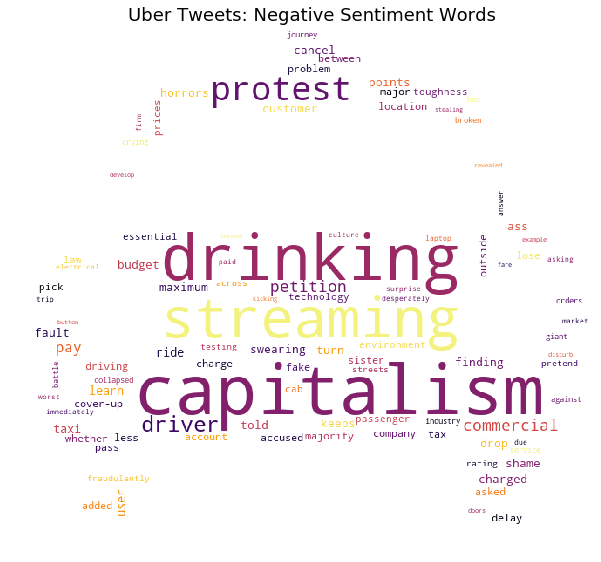

In [48]:
#Negative words Wordcloud.
plt.figure(figsize=(10,10))
negwordcloud = WordCloud(mask=mask,background_color='white',colormap='inferno',normalize_plurals=True).generate_from_frequencies(negawords)
plt.title("Uber Tweets: Negative Sentiment Words", fontsize=18)
plt.axis("off")
plt.imshow(negwordcloud)
plt.savefig(r'C:\Users\Admin\Documents\UberProject\code\TwitterStreamer\negativewordcloud.png')

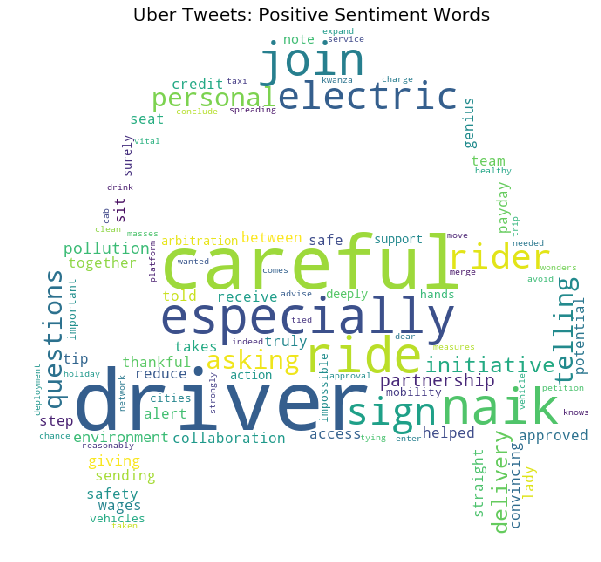

In [49]:
#Positive words word cloud.
plt.figure(figsize=(10,10))
negwordcloud = WordCloud(mask=mask,background_color='white',normalize_plurals=True).generate_from_frequencies(poswords)
plt.title("Uber Tweets: Positive Sentiment Words",fontsize=18)
plt.axis("off")
plt.imshow(negwordcloud)
plt.savefig(r'C:\Users\Admin\Documents\UberProject\code\TwitterStreamer\positivewordcloud.png')